# PyTorch中的Tensor基础

PyTorch的tensor和Numpy的Array，Pandas的Series和Dataframe类似，是了解应用这些代码库的基础，这里首先简单快速地了解Tensor及其在PyTorch的作用。

## 快速了解Tensor

pytorch作为NumPy的替代品，可以利用GPU进行计算，是一个高灵活性、高效率的深度学习工具箱。

Tensor（张量）类似于NumPy的ndarray，但还可以在GPU上使用来加速计算。因此经常能看到把numpy的数组包装为tensor再运算。tensor的操作和numpy中的数组操作类似，详见官网。下面列举一些简单例子。首先pytorch的导入是import torch，因为torch一直都是那个torch，一开始是别的语言写的，现在在python下，所以就叫pytorch。

In [1]:
import torch

Tensor是pytorch的基本数据类型：

In [2]:
import numpy as np

# 我们经常会联合numpy使用torch，例如这里初始化0到4的张量
x = torch.Tensor(np.arange(5))
x

tensor([0., 1., 2., 3., 4.])

In [3]:
# 构建一个 5x3 的张量:
x = torch.Tensor(np.arange(15).reshape(5, 3))
x

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.],
        [12., 13., 14.]])

In [4]:
# 和numpy一样的广播功能
x + 1

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.],
        [13., 14., 15.]])

PyTorch提供了Tensor，其在概念上与 numpy 数组相同，也是一个n维数组, PyTorch 也提供了很多能在这些 Tensor 上操作的函数，类似于Numpy上的函数

但tensor还拥有一个numpy数组没有的功能，就是autograd自动求导，这在构建神经网络时非常重要。关于autograd的介绍可以参考Pytorch的官方文档：[A GENTLE INTRODUCTION TO TORCH.AUTOGRAD](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#:~:text=Conceptually%2C%20autograd%20keeps%20a%20record%20of%20data%20%28tensors%29,the%20input%20tensors%2C%20roots%20are%20the%20output%20tensors.)，这里我们简单谈谈其中的关键点

## autograd自动求导

通过前面几个[B站上3Blue1Brown讲解神经网络原理的视频](https://space.bilibili.com/88461692/channel/seriesdetail?sid=1528929)，大家可以了解到神经网络的前向计算和反向传播过程，其中的梯度计算在PyTorch中就是由autograd来帮助实现的。

可以说在PyTorch中，所有神经网络实现的核心就是autograd。autograd 为张量上的所有运算都提供了自动求导机制。

torch.Tensor 是其核心类。如果设置它的属性 .requires_grad 为 True，那么它将会追踪对于该张量的所有运算。当完成计算后可以通过调用 .backward() 来自动计算所有梯度，并自动计入到.grad属性中

还有一个类对于autograd的实现非常重要：Function。Tensor 和 Function 互相连接生成了一个有向无环图(directed acyclic graph)，就是一个树状的数据结构，它记录了完整的计算历史，这样沿着整个图，根据链式法则，就能计算梯度。Function记录在tensor中，对应其 grad_fn 属性。用户直接创建的tensor的grad_fn 是None，即新建一个tensor，它是没有grad_fn的。

举个例子：构造一个tensor，设置requires_grad=True来收集梯度信息。

In [5]:
a = torch.tensor([2.0, 3.0], requires_grad=True)
a

tensor([2., 3.], requires_grad=True)

这个tensor参与一个简单函数计算

In [6]:
q = 3 * a**3
q

tensor([24., 81.], grad_fn=<MulBackward0>)

可以注意到q是一个计算结果，且它有grad_fn属性。

In [7]:
from torchviz import make_dot

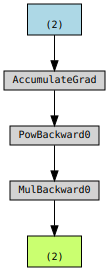

In [8]:
make_dot(q)

蓝色叶节点就是输入张量，绿色根节点是输出张量，灰色中间计算结果张量每一步都会被记录下来，并且有对应grad_fn

现在我们简单看下反向传播

In [9]:
external_grad = torch.tensor([1., 1.])
q.backward(gradient=external_grad)

In [10]:
9*a**2 == a.grad

tensor([True, True])

可以看到，q关于a的梯度是正确的。

此外，为了阻止跟踪历史，可以使用 `with torch.no_grad():` 包裹代码块，例如评价模型时，我们不要再训练模型，这时候就很有用，后面我们有一个完整实例。

综上：

- 在PyTorch中，torch.Tensor是存储和变换数据的主要工具。
- Tensor与Numpy的多维数组非常相似。
- Tensor还提供了GPU计算和自动求梯度等更多功能，这些使Tensor更适合深度学习。